In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Smoking Data.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Encoding data

In [4]:
y=df['smoker']

In [5]:
x=df.drop('smoker', axis=1)

In [6]:
x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le= LabelEncoder()

In [9]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    else:
        x[column]= le.fit_transform(x[column])

In [10]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Classification with decision tree algorithm

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf=DecisionTreeClassifier()

# for classification split data into 70%train and 30%test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=.30, random_state=1)

In [15]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


# fit train data

In [16]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [17]:
clf.predict(xtest)

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'n

In [18]:
ytest

559      no
1087     no
1020     no
460      no
802      no
       ... 
323      no
1268     no
134      no
1274    yes
876      no
Name: smoker, Length: 402, dtype: object

In [19]:
clf.score(xtrain,ytrain)

0.9989316239316239

In [20]:
clf.score(xtest, ytest)

0.6766169154228856

In [21]:
clf.score(x,y)

0.9020926756352765

# Graphical representation

In [22]:
from sklearn import tree

[Text(394.3469638949672, 1330.6875, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(243.1472408369803, 1274.0625, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(63.49234135667396, 1217.4375, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(58.60831509846827, 1160.8125, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(34.18818380743983, 1104.1875, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(14.652078774617067, 1047.5625, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(9.768052516411379, 990.9375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(19.536105032822757, 990.9375, 'age <= 28.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(9.768052516411379, 934.3125, 'bmi <= 20.663\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(4.884026258205689, 877.6875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(14.652078774617067, 877.6875, 'gini = 0.0\nsa

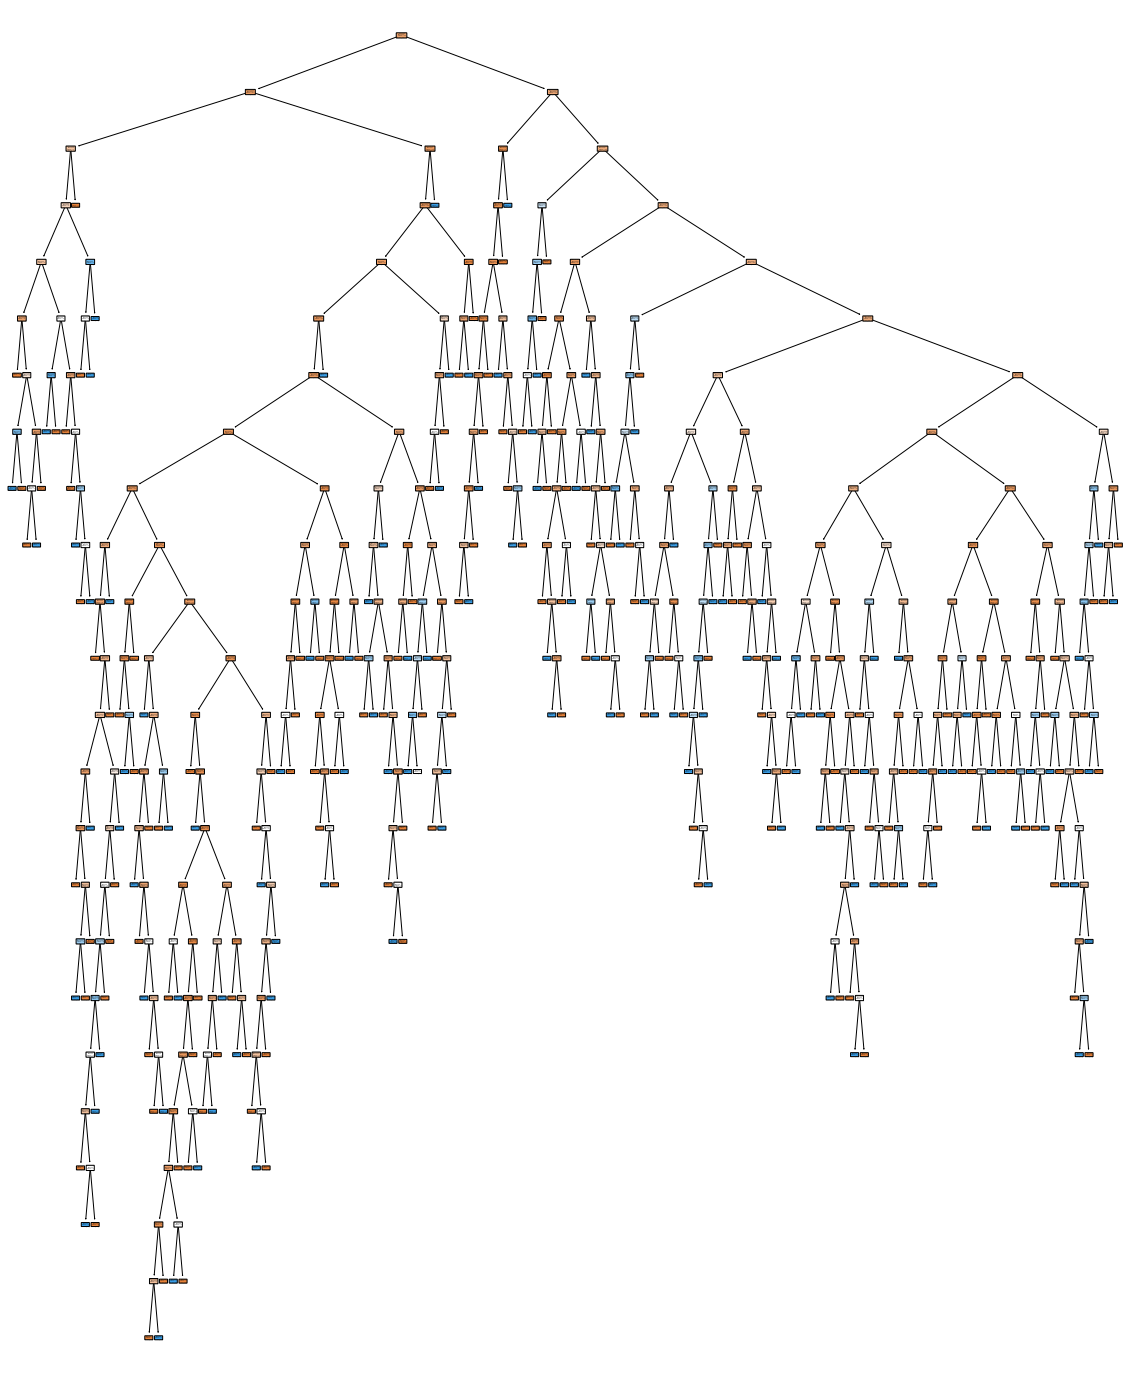

In [23]:
plt.figure(figsize= (20,25))
tree.plot_tree(clf, filled=True, rounded=True,feature_names= x.columns)